In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')


from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [9]:
data='dataset/sport.csv'
df=pd.read_csv(data)
df.columns =['Height', 'Weight','Age']
print(df)
A=df['Age'] # need it

     Height  Weight  Age
0       194      91   35
1       191      95   36
2       196      93   36
3       195      88   37
4       178      77   31
..      ...     ...  ...
594     165     111   17
595     156     119   27
596     169     121   15
597     153     125   26
598     154     103   24

[599 rows x 3 columns]


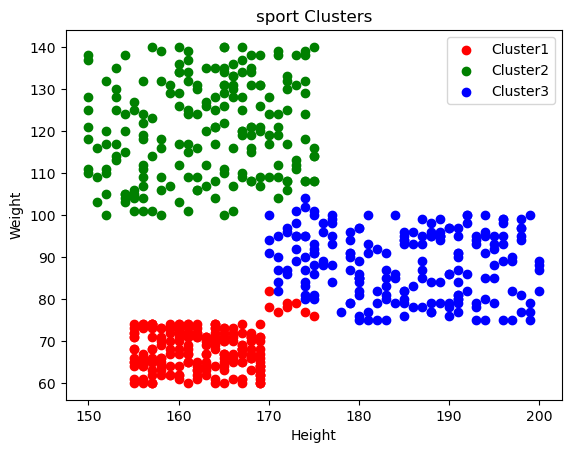

0.5953968999753387
File saved successfully 


In [3]:
x = df.iloc[:, [0,1]].values
k_model = KMeans(n_clusters=3, random_state=1)
y_KMeans = k_model.fit_predict(x)
plt.scatter(x[y_KMeans == 0, 0], x[y_KMeans == 0, 1],c='red', label='Cluster1')
plt.scatter(x[y_KMeans == 1, 0], x[y_KMeans == 1, 1],c='green', label='Cluster2')
plt.scatter(x[y_KMeans == 2, 0], x[y_KMeans == 2, 1],c='blue', label='Cluster3')
plt.title('sport Clusters')
plt.xlabel('Height')
plt.ylabel('Weight')

plt.legend()
plt.show()
score = metrics.silhouette_score(x, y_KMeans)
print(score)


z = np.array([x[:, 0], x[:, 1], y_KMeans])
z = z.T
np.savetxt('dataset/clustered_sport.csv', z, delimiter=',',fmt='%1.4d')
print('File saved successfully ')

In [11]:
data='dataset/clustered_sport.csv'
df=pd.read_csv(data)
df.columns =['Height','Weight', 'cluster']
df['Age'] =A
print(df)

     Height  Weight  cluster  Age
0       191      95        2   35
1       196      93        2   36
2       195      88        2   36
3       178      77        2   37
4       198      95        2   31
..      ...     ...      ...  ...
593     165     111        1   28
594     156     119        1   17
595     169     121        1   27
596     153     125        1   15
597     154     103        1   26

[598 rows x 4 columns]


In [13]:
x=df.iloc[:,[0,1,3]].values # 3 features
y=df.iloc[:,2].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=1)
cls=SVC()
cls.fit(x_train,y_train)
y_pred=cls.predict(x_test)

#print("confusion_matrix \n ",confusion_matrix(y_test,y_pred))
#print("classification_report \n ",classification_report(y_test,y_pred))

height=input("Enter height: ")
weight=input("Enter weight: ")
Age=input("Enter Age: ")

result=cls.predict([[height,weight,Age]])
print("predicted class is : "+str(result))

Enter height: 191
Enter weight: 95
Enter Age: 35
predicted class is : [2]
